<a href="https://colab.research.google.com/github/sree268/Machine-Learning/blob/main/housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Loading data

In [47]:
HOUSING_PATH = os.path.join("datasets","housing")

In [48]:
from pathlib import Path
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [49]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [50]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [51]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [52]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


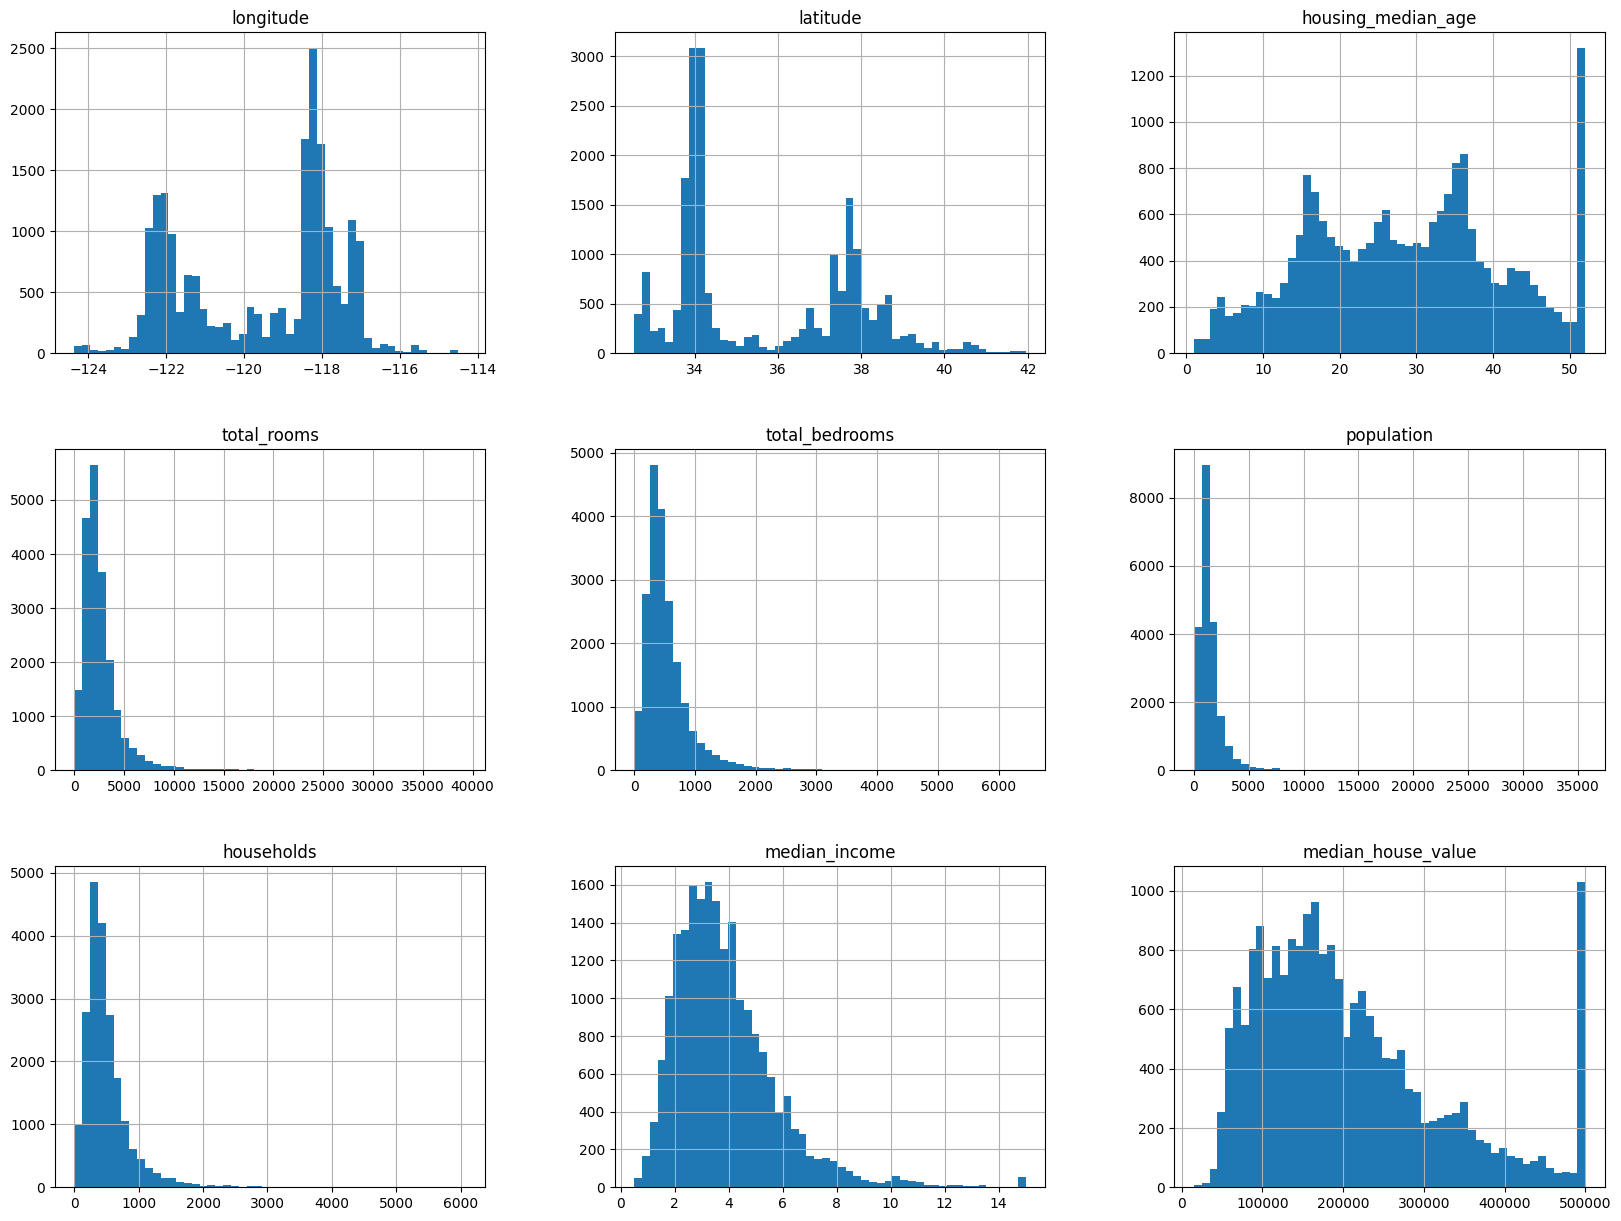

In [53]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Creating  test set

### Random Sampling

In [54]:
#I'm going to write a function for randomly selecting 20% of the data from the dataset.
def split_train_test(data, test_ratio):
    np.random.seed(42)           #to generate same random values for every run
    shuffled_indices = np.random.permutation(len(data)) #generates an random array with values ranges in 0 to len(data)
    test_set_size = int(len(data) * test_ratio)         #size of test set
    test_indices = shuffled_indices[:test_set_size]     #assign first random values to test set
    train_indices = shuffled_indices[test_set_size:]    #assing rest to train set
    return data.iloc[train_indices], data.iloc[test_indices] #returns corresponding rows

In [55]:
train_set, test_set = split_train_test(housing, 0.2)

In [56]:
print("Length of Train set :", len(train_set))
print("Length of Train set :", len(test_set))

Length of Train set : 16512
Length of Train set : 4128


In [57]:
# Using sklearn train_test_split function

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### Stratified Sampling

In [58]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0.,1.5,3.,4.5,6.,np.inf], labels=[1,2,3,4,5])

<Axes: >

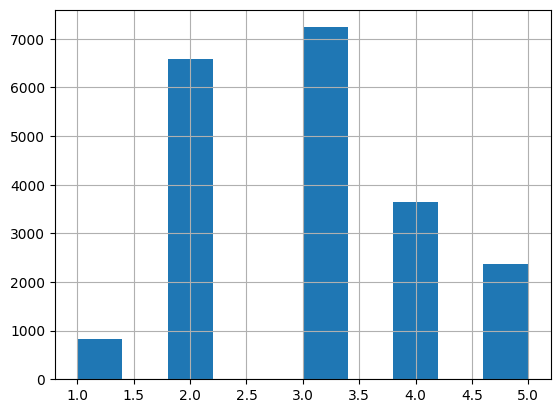

In [59]:
housing["income_cat"].hist()

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [61]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and visualize the data to gain insights

In [62]:
#Making a copy so that original will be protected
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

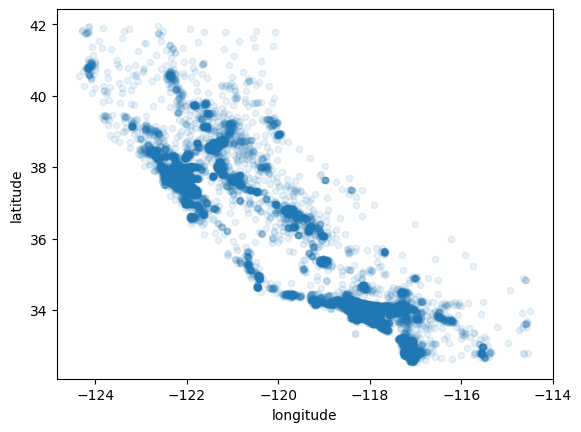

In [63]:
#Visualizing geographical data
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

This shows the high density areas in california

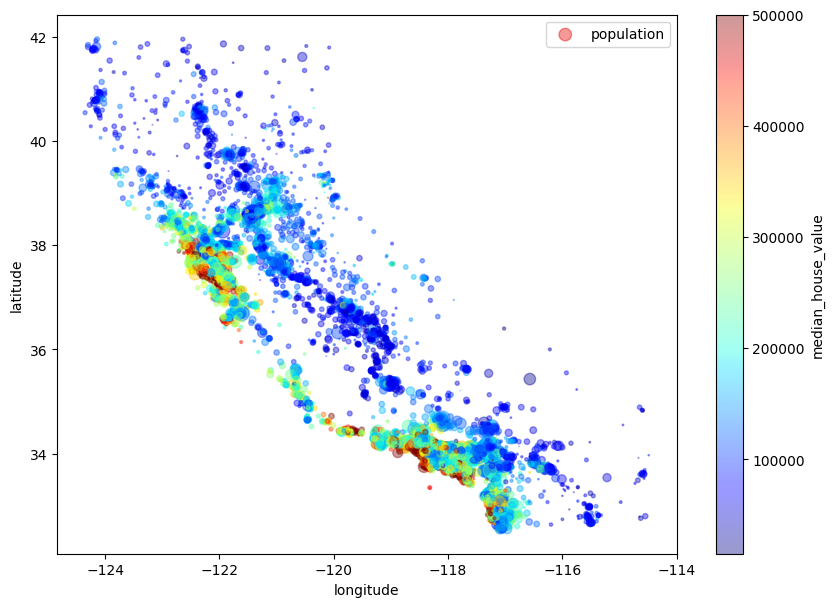

In [64]:
#Housing prices
#The radius of each circle represents districts population, color represents the price.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )

plt.legend()

In [65]:
#Looking for correlations

corr_matrix = housing.corr()

<ipython-input-65-be925922e27f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [66]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

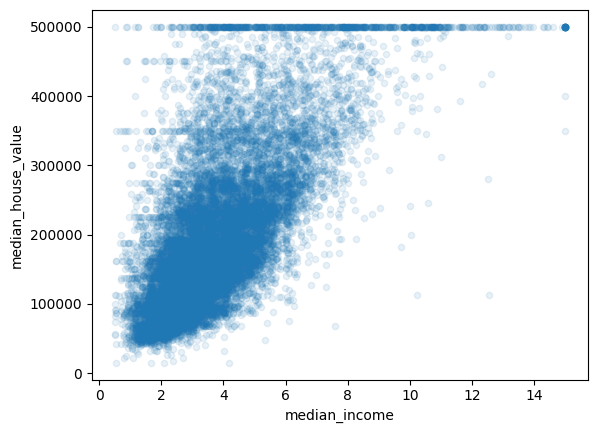

In [67]:
#median_income is the most promising attribute to predict the median income so have a closer look
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [68]:
# generating new attributes for better performance
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [69]:
corr_matrix = housing.corr()

<ipython-input-69-bac487469033>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [70]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688380
rooms_per_household         0.143663
total_rooms                 0.137455
housing_median_age          0.102175
households                  0.071426
total_bedrooms              0.054635
population                 -0.020153
population_per_household   -0.038224
longitude                  -0.050859
latitude                   -0.139584
bedrooms_per_room          -0.256397
Name: median_house_value, dtype: float64

### Prepare the data

In [71]:
#separating predictors and target value
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data cleaning

In [72]:
#Function to calculate median and use for future
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [73]:
#creating df with only numericals for imputer
housing_num = housing.drop("ocean_proximity", axis=1)

In [74]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [75]:
#returns median for each numerical attribute
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [76]:
#Transforming training set by replacing missing values
X = imputer.transform(housing_num)

In [77]:
#Handling text data
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [78]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom transformers

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin

In [80]:
#Custom class for adding attributes
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [81]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Feature Scaling

In [82]:
#for normalization use minmaxscaler from sklearn
#but we use standardization to prevent outliners
#We also look at pipelines which enables applying multiple transformations at once.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [83]:
num_pipeline = Pipeline([

    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),

])

In [84]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [85]:
#Use a common transformer for num data and cat data
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train a model

In [86]:
# importing linear regression model from sklearn
from sklearn.linear_model import LinearRegression

In [87]:
#feeding data in to the model
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [88]:
#checking on few instances from training set
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [276608.27419651 333603.0303772  118237.5726011  108255.75159886
 308943.82732346]
Labels: [458300.0, 483800.0, 101700.0, 96100.0, 361800.0]


Predictions are not exactly accurate


In [89]:
#measuring RMSE on the whole train set
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67769.12117461127

In [90]:
#Using decision trees
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [91]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

No error means maybe our model badly overfitting the training set.

In [92]:
#using cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [93]:
def display_scores(scores):
    print("Scores :",scores)
    print("Mean :", scores.mean())
    print("Standard deviation :", scores.std())

In [94]:
display_scores(tree_rmse_scores)

Scores : [68002.37418708 66630.76685774 70892.87203544 73458.42595281
 68977.44638767 68624.45701927 71345.32672994 72266.32430216
 69901.92147456 69766.7354464 ]
Mean : 69986.66503930914
Standard deviation : 1950.5457997763651


In [95]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores : [69717.57852026 66650.26617871 66488.43193213 70478.22519838
 66837.93229332 68220.31091521 66922.70445332 69700.47781664
 67122.26131607 67802.47918508]
Mean : 67994.06678091262
Standard deviation : 1394.937701550329


In [96]:
#using Random Forest algorithm
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [97]:
#checking performance of random forest
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores : [48540.62289778 49730.07573935 47404.55801096 50313.48507637
 48717.03997654 50009.97321029 50398.85810912 51510.45850816
 50320.11107602 49841.16775131]
Mean : 49678.6350355908
Standard deviation : 1105.3884207853184


## Fine tune the model
### Using Grid Search

In [102]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True
                           )
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [103]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [104]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [105]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

63411.47095924869 {'max_features': 2, 'n_estimators': 3}
54874.860699573444 {'max_features': 2, 'n_estimators': 10}
52535.07830710115 {'max_features': 2, 'n_estimators': 30}
59645.61901770375 {'max_features': 4, 'n_estimators': 3}
52363.105836540875 {'max_features': 4, 'n_estimators': 10}
50004.37399943908 {'max_features': 4, 'n_estimators': 30}
58861.64647722473 {'max_features': 6, 'n_estimators': 3}
51630.38844008692 {'max_features': 6, 'n_estimators': 10}
49469.51905406181 {'max_features': 6, 'n_estimators': 30}
58859.247721273554 {'max_features': 8, 'n_estimators': 3}
51699.945489939215 {'max_features': 8, 'n_estimators': 10}
49922.300206614396 {'max_features': 8, 'n_estimators': 30}
62168.354164822886 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53898.83122918965 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59819.885679776206 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52493.006737222604 {'bootstrap': False, 'max_features': 3, 'n_estimat

In [107]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.78817186e-02, 6.57164763e-02, 3.97676121e-02, 1.87939974e-02,
       1.64671539e-02, 1.69861979e-02, 1.53314277e-02, 2.98417655e-01,
       6.56575255e-02, 1.10295917e-01, 8.28831304e-02, 8.01694043e-03,
       1.76434536e-01, 1.27338768e-04, 3.42609640e-03, 3.79627745e-03])

In [108]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2984176547448103, 'median_income'),
 (0.17643453572919165, 'INLAND'),
 (0.11029591669870278, 'pop_per_hhold'),
 (0.0828831303669184, 'bedrooms_per_room'),
 (0.07788171862184348, 'longitude'),
 (0.06571647633015341, 'latitude'),
 (0.06565752547924587, 'rooms_per_hhold'),
 (0.039767612056046335, 'housing_median_age'),
 (0.0187939974265322, 'total_rooms'),
 (0.016986197910571623, 'population'),
 (0.016467153863075328, 'total_bedrooms'),
 (0.015331427723123391, 'households'),
 (0.008016940425373136, '<1H OCEAN'),
 (0.0037962774542943793, 'NEAR OCEAN'),
 (0.0034260964020331177, 'NEAR BAY'),
 (0.00012733876808452055, 'ISLAND')]

In [109]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

50125.84354774981

In [98]:
#let's check on test set

X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
test_predictions = forest_reg.predict(X_test_prepared)
test_mse = mean_squared_error(y_test,test_predictions)
test_rmse = np.sqrt(test_mse)
test_rmse

50539.44992376002

In [99]:
test_predictions[:5], list(y_test[:5])

(array([396801.12, 201734.  , 407929.17, 318788.03, 202350.01]),
 [397700.0, 202900.0, 310000.0, 314300.0, 187500.0])